# Load Parquet Files into DataFrames

In [3]:
import pandas as pd
import os
# Directory containing Parquet files
parquet_directory = 'ExtractedFiles'

# Initialize a dictionary to hold the DataFrames
dataframes = {}

# Check if the directory exists
if os.path.exists(parquet_directory):
    # List all Parquet files in the directory
    parquet_files = [f for f in os.listdir(parquet_directory) if f.endswith('.parquet')]

    # Process each Parquet file
    for parquet_file in parquet_files:
        filepath = os.path.join(parquet_directory, parquet_file)
        # Load the Parquet file into a DataFrame
        df = pd.read_parquet(filepath)
        
        # Add the DataFrame to the dictionary
        # Use the filename (without the extension) as the key
        key = os.path.splitext(parquet_file)[0]
        dataframes[key] = df

    print("Loaded DataFrames from Parquet files.")
else:
    print(f"Directory does not exist: {parquet_directory}")

# Iterate through each key, value pair in the dataframes dictionary
for key, df in dataframes.items():
    print(f"Information for DataFrame: {key}")
    # Use the info() method to print detailed information about the DataFrame
    df.info()
    #df.head()
    print("\n")  # Add a newline for better readability between DataFrame infos

# Iterate through each key, value pair in the dataframes dictionary
for key, df in dataframes.items():
    print(f"Head of DataFrame '{key}':")
    print(df.head())  # Print the first few rows of the DataFrame
    print("-" * 40)  # Print a separator for readability


Loaded DataFrames from Parquet files.
Information for DataFrame: activity
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20472180 entries, 0 to 20472179
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   EntityNumber    object
 1   ActivityGroup   int64 
 2   NaceVersion     int64 
 3   NaceCode        int64 
 4   Classification  object
dtypes: int64(3), object(2)
memory usage: 781.0+ MB


Information for DataFrame: address
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821223 entries, 0 to 2821222
Data columns (total 13 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   EntityNumber      object
 1   TypeOfAddress     object
 2   CountryNL         object
 3   CountryFR         object
 4   Zipcode           object
 5   MunicipalityNL    object
 6   MunicipalityFR    object
 7   StreetNL          object
 8   StreetFR          object
 9   HouseNumber       object
 10  Box               object
 11  ExtraAddressInfo  o

# Filtered DataFrame

In [15]:
import pandas as pd
import os
from functools import reduce

# Filtering for 'OfficialName'
official_name_df = dataframes['denomination'][
    (dataframes['denomination']['TypeOfDenomination'] == 1) & 
    (dataframes['denomination']['Language'] == 2)
][['Denomination', 'EntityNumber']].copy()  # Assuming 'Denomination' is the correct column to use

# Renaming column as per requirement
official_name_df.rename(columns={'Denomination': 'OfficialName'}, inplace=True)


abbreviation_df = dataframes['denomination'][
    (dataframes['denomination']['TypeOfDenomination'] == 2) & 
    (dataframes['denomination']['Language'] == 2)
][['Denomination', 'EntityNumber']].copy()  


abbreviation_df.rename(columns={'Denomination': 'Abbreviation'}, inplace=True)

tradeName_df = dataframes['denomination'][
    (dataframes['denomination']['TypeOfDenomination'] == 3) & 
    (dataframes['denomination']['Language'] == 2)
][['Denomination', 'EntityNumber']].copy()  

tradeName_df.rename(columns={'Denomination': 'TradeName'}, inplace=True)


zipcode_df = dataframes['address'][
    (dataframes['address']['TypeOfAddress'] == "REGO")
][['Zipcode', 'EntityNumber']].copy()  

zipcode_df.rename(columns={'Zipcode': 'ZipCode'}, inplace=True)


Municipality_df = dataframes['address'][
    (dataframes['address']['TypeOfAddress'] == "REGO")
][['MunicipalityNL', 'EntityNumber']].copy()  

Municipality_df.rename(columns={'MunicipalityNL': 'Municipality'}, inplace=True)


Street_df = dataframes['address'][
    (dataframes['address']['TypeOfAddress'] == "REGO")
][['StreetNL', 'EntityNumber']].copy()  

Street_df.rename(columns={'StreetNL': 'Street'}, inplace=True)


HouseNumber_df = dataframes['address'][
    (dataframes['address']['TypeOfAddress'] == "REGO")
][['HouseNumber', 'EntityNumber']].copy()  

HouseNumber_df.rename(columns={'HouseNumber': 'HouseNumber'}, inplace=True)

Email_df = dataframes['contact'][
    (dataframes['contact']['EntityContact'].isin(['ENT', 'EST'])) & 
    (dataframes['contact']['ContactType'] == 'EMAIL')
][['Value', 'EntityNumber']].copy()

Email_df.rename(columns={'Value': 'Email'}, inplace=True)

Tel_df = dataframes['contact'][
    (dataframes['contact']['EntityContact'].isin(['ENT', 'EST'])) & 
    (dataframes['contact']['ContactType'] == 'TEL')
][['Value', 'EntityNumber']].copy()

Tel_df.rename(columns={'Value': 'TEL'}, inplace=True)

URL_df = dataframes['contact'][
    (dataframes['contact']['EntityContact'].isin(['ENT', 'EST'])) & 
    (dataframes['contact']['ContactType'] == 'WEB')
][['Value', 'EntityNumber']].copy()

URL_df.rename(columns={'Value': 'URL'}, inplace=True)

Acitivity_df = dataframes['activity'][
     (dataframes['activity']['Classification'] == 'MAIN')
][['NaceCode', 'EntityNumber']].copy()

URL_df.rename(columns={'NaceCode': 'ActivityNACE'}, inplace=True)

# Combining the filtered DataFrames
# Assuming df_list is a list of your DataFrames
df_list = [official_name_df, abbreviation_df, tradeName_df,zipcode_df, Municipality_df, Street_df, HouseNumber_df, Email_df, Tel_df, URL_df, Acitivity_df]

# Using reduce to merge all DataFrames in the list based on 'EntityNumber'
combined_df = reduce(lambda left, right: pd.merge(left, right, on='EntityNumber', how='left'), df_list)

# Now, 'EntityNumber' can be set as the index in the combined DataFrame
combined_df.set_index('EntityNumber', inplace=True)

combined_df



,OfficialName,Abbreviation,TradeName,ZipCode,Municipality,Street,HouseNumber,Email,TEL,URL,NaceCode
EntityNumber,,,,,,,,,,,
0200.065.765,Intergemeentelijke Vereniging Veneco,Veneco,NaN,9070,Destelbergen,Panhuisstraat,1,NaN,NaN,NaN,84130.0
0200.065.765,Intergemeentelijke Vereniging Veneco,Veneco,NaN,9070,Destelbergen,Panhuisstraat,1,NaN,NaN,NaN,41101.0
0200.065.765,Intergemeentelijke Vereniging Veneco,Veneco,NaN,9070,Destelbergen,Panhuisstraat,1,NaN,NaN,NaN,70111.0
0200.068.636,Farys,NaN,NaN,9000,Gent,Stropstraat,1,NaN,NaN,NaN,36000.0
0200.068.636,Farys,NaN,NaN,9000,Gent,Stropstraat,1,NaN,NaN,NaN,36000.0
...,...,...,...,...,...,...,...,...,...,...,...
1006.689.952,HESA CONSTRUCT,NaN,NaN,2400,Mol,Windmolenstraat,14,NaN,NaN,NaN,NaN
1006.690.051,Sterrenwacht,Sterrenwacht,NaN,1082,Sint-Agatha-Berchem,Groot-Bijgaardenstraat,481,niki.v@sterrenwacht.org,NaN,NaN,NaN
1006.690.744,PREVENZA,NaN,PREVENZA,9940,Evergem,Gaverse,47,info@prevenza.be,NaN,NaN,NaN


# Filtering 
If column CountryNL has a value, it means that the business is active in the country. We only want Belgian businesses.

In [16]:
# Step 1: Identify rows in 'address' DataFrame with missing 'CountryNL' values
missing_country_nl = dataframes['address']['CountryNL'].isna()

# Extract 'EntityNumber' for rows where 'CountryNL' is missing
missing_entities = dataframes['address'][missing_country_nl]['EntityNumber']

# Step 2: Filter these 'EntityNumber's out of your main dataset 'final_df'
# Assuming 'final_df' has 'EntityNumber' as its index or a column
if 'EntityNumber' in combined_df.columns:
    # If 'EntityNumber' is a column in 'final_df'
    final_df_filtered = combined_df[combined_df['EntityNumber'].isin(missing_entities)]
else:
    # If 'EntityNumber' is the index in 'final_df'
    final_df_filtered = combined_df[combined_df.index.isin(missing_entities)]




# Filtering on URL
We make a .parquet file conatining the rows with a URL

In [17]:
filtered_df_with_url = final_df_filtered[final_df_filtered['URL'].notna()]

# Filtering on unique EntityNumber
Delete all duplicates

In [18]:
# Resetting the index to make 'EntityNumber' a column
df_reset = filtered_df_with_url.reset_index()

# Dropping duplicate 'EntityNumber' values, keeping the first occurrence
df_final_URL = df_reset.drop_duplicates(subset='EntityNumber', keep='first')

# Optionally, setting 'EntityNumber' as the index again
#df_final = df_deduplicated.set_index('EntityNumber')


In [19]:
print(df_final_URL.info())
print(df_final_URL.head(50))

<class 'pandas.core.frame.DataFrame'>
Index: 17239 entries, 0 to 31798
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EntityNumber  17239 non-null  object 
 1   OfficialName  17239 non-null  object 
 2   Abbreviation  2460 non-null   object 
 3   TradeName     454 non-null    object 
 4   ZipCode       17239 non-null  object 
 5   Municipality  17239 non-null  object 
 6   Street        17239 non-null  object 
 7   HouseNumber   17239 non-null  object 
 8   Email         15254 non-null  object 
 9   TEL           5611 non-null   object 
 10  URL           17239 non-null  object 
 11  NaceCode      15297 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.7+ MB
None
     EntityNumber                                       OfficialName  \
0    0201.310.929                                                IGL   
3    0202.239.951                                           PROXIMUS   
7    0203.201.340   

# Analyse and visualize the final URL dataframe

           NaceCode
count  15297.000000
mean   61084.066680
std    19465.084862
min     1110.000000
25%    46460.000000
50%    62020.000000
75%    73110.000000
max    97000.000000
<class 'pandas.core.frame.DataFrame'>
Index: 17239 entries, 0 to 31798
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EntityNumber  17239 non-null  object 
 1   OfficialName  17239 non-null  object 
 2   Abbreviation  2460 non-null   object 
 3   TradeName     454 non-null    object 
 4   ZipCode       17239 non-null  object 
 5   Municipality  17239 non-null  object 
 6   Street        17239 non-null  object 
 7   HouseNumber   17239 non-null  object 
 8   Email         15254 non-null  object 
 9   TEL           5611 non-null   object 
 10  URL           17239 non-null  object 
 11  NaceCode      15297 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.7+ MB
None
EntityNumber    17239
OfficialName    17239
Abbreviation

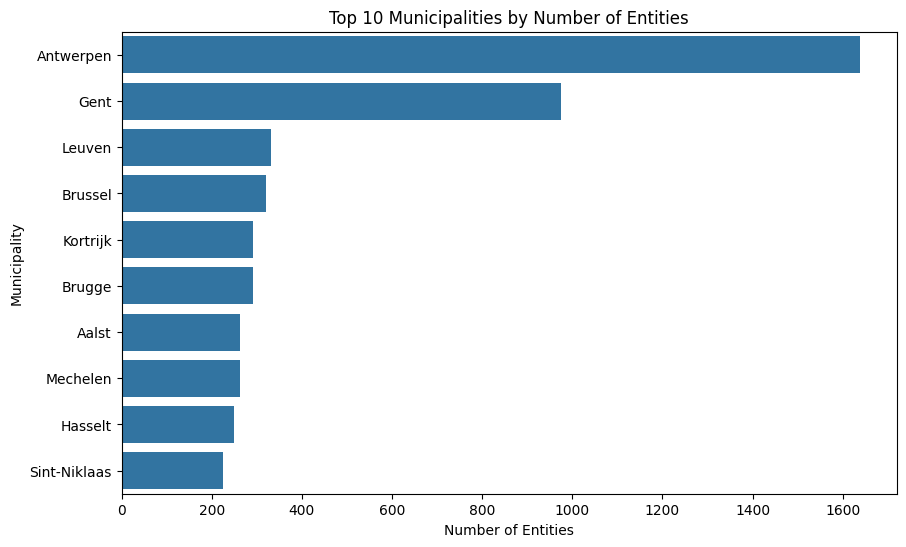

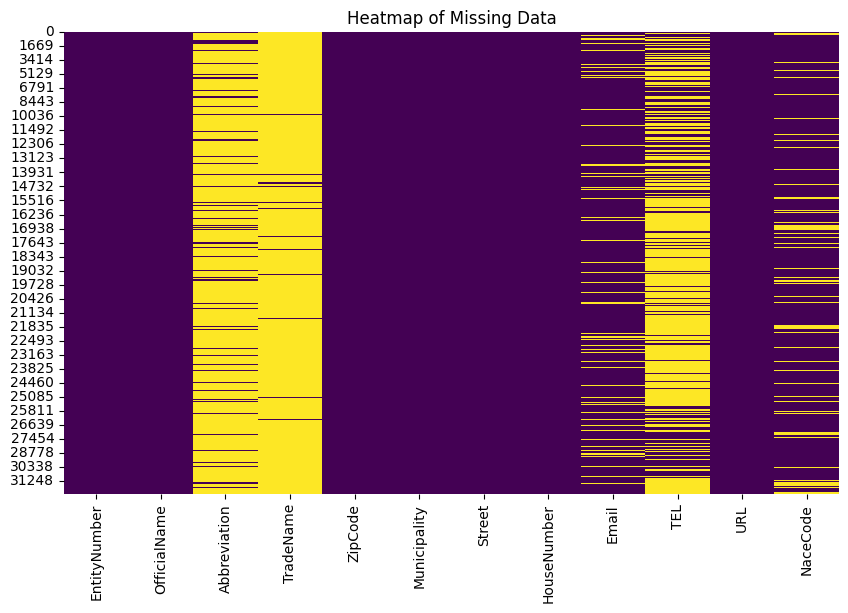

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns and info
print(df_final_URL.describe())
print(df_final_URL.info())

# Count of non-null values to assess missing data
print(df_final_URL.count())

# Frequency of categories in 'Municipality'
municipality_counts = df_final_URL['Municipality'].value_counts()
print(municipality_counts.head())  # Top 5 municipalities

# Visualization: Number of Entities per Municipality (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=municipality_counts.head(10), y=municipality_counts.head(10).index)
plt.xlabel('Number of Entities')
plt.ylabel('Municipality')
plt.title('Top 10 Municipalities by Number of Entities')
plt.show()

# Visualization: Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df_final_URL.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()


Drop Abbreviations, TradeName and TEL columns

In [21]:
df_final_URL = df_final_URL.drop(['Abbreviation', 'TradeName', 'Email','TEL'], axis=1)

# Statistics of final URL Dataframe

           NaceCode
count  15297.000000
mean   61084.066680
std    19465.084862
min     1110.000000
25%    46460.000000
50%    62020.000000
75%    73110.000000
max    97000.000000
<class 'pandas.core.frame.DataFrame'>
Index: 17239 entries, 0 to 31798
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EntityNumber  17239 non-null  object 
 1   OfficialName  17239 non-null  object 
 2   ZipCode       17239 non-null  object 
 3   Municipality  17239 non-null  object 
 4   Street        17239 non-null  object 
 5   HouseNumber   17239 non-null  object 
 6   URL           17239 non-null  object 
 7   NaceCode      15297 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1.2+ MB
None
EntityNumber    17239
OfficialName    17239
ZipCode         17239
Municipality    17239
Street          17239
HouseNumber     17239
URL             17239
NaceCode        15297
dtype: int64


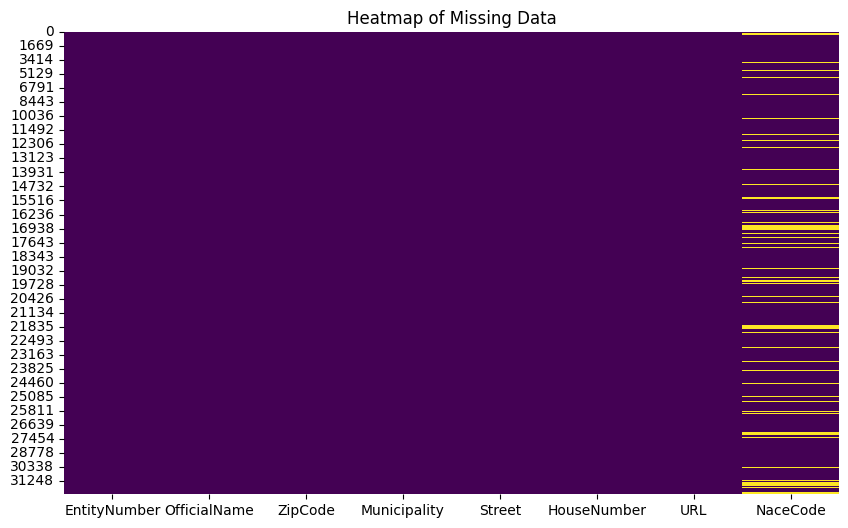

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns and info
print(df_final_URL.describe())
print(df_final_URL.info())

# Count of non-null values to assess missing data
print(df_final_URL.count())

# Visualization: Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(df_final_URL.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

# Visualise duplicate entries in row

In [23]:
# Identifying duplicate entries
duplicate_counts = df_final_URL['URL'].value_counts()
duplicates_only = duplicate_counts[duplicate_counts > 1]

# Print each duplicate entry and its count
for entry, count in duplicates_only.items():
    print(f"Entry '{entry}' is duplicated {count} times.")

# Count the total number of duplicates (not just distinct duplicate values)
total_duplicates = df_final_URL.duplicated(subset='URL', keep=False).sum()
print(f"\nTotal number of duplicate entries: {total_duplicates}")


Entry 'WWW.EQUANS.BE' is duplicated 53 times.
Entry 'www.storm.be' is duplicated 41 times.
Entry 'www.engie.com' is duplicated 24 times.
Entry 'www.dockx.com' is duplicated 15 times.
Entry 'www.planet-group.be' is duplicated 12 times.
Entry 'www.liantis.be' is duplicated 12 times.
Entry 'www.bakkerijaernoudt.be' is duplicated 9 times.
Entry 'www.benedenti.be' is duplicated 9 times.
Entry 'www.verstraete.biz' is duplicated 8 times.
Entry 'www.equans.be' is duplicated 8 times.
Entry 'www.verelst.be' is duplicated 7 times.
Entry 'www.benjogroup.eu' is duplicated 7 times.
Entry 'aam-solutions.com' is duplicated 7 times.
Entry 'www.valckenier.be' is duplicated 7 times.
Entry 'www.armonea.be' is duplicated 6 times.
Entry 'www.argenta.be' is duplicated 6 times.
Entry 'www.9altitudes.com' is duplicated 6 times.
Entry 'www.vastgoed-degroote.be' is duplicated 6 times.
Entry 'www.kingslizepizza.be' is duplicated 6 times.
Entry 'www.v-bio.ventures' is duplicated 5 times.
Entry 'www.vl-holding.be' 

# Saving the combined dataset

In [24]:
# Define the path for the new combined Parquet file in your directory
new_combined_parquet_file_path = './combined_filtered_dataset.parquet'

# Save the combined DataFrame as a Parquet file
df_final_URL.to_parquet(new_combined_parquet_file_path)

print(f"Combined and filtered DataFrame saved as Parquet file at: {new_combined_parquet_file_path}")

Combined and filtered DataFrame saved as Parquet file at: ./combined_filtered_dataset.parquet


In [25]:
df_final_URL.to_csv('df_final_URL.csv', index=False)

# Statistics for complete Dataset

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical columns and info
print(final_df_filtered.describe())
print(final_df_filtered.info())

# Count of non-null values to assess missing data
print(final_df_filtered.count())

# Frequency of categories in 'Municipality'
municipality_counts = final_df_filtered['Municipality'].value_counts()
print(municipality_counts.head())  # Top 5 municipalities

# Visualization: Number of Entities per Municipality (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(x=municipality_counts.head(10), y=municipality_counts.head(10).index)
plt.xlabel('Number of Entities')
plt.ylabel('Municipality')
plt.title('Top 10 Municipalities by Number of Entities')
plt.show()

# Visualization: Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(final_df_filtered.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

Saving complete DataSet

In [ ]:
final_df_filtered.to_csv('final_df_filtered.csv', index=True)

# Checking Activities of URL dataset 


       EntityNumber                                       OfficialName  \
0      0201.310.929                                                IGL   
3      0202.239.951                                           PROXIMUS   
7      0203.201.340                          Nationale Bank van België   
11     0206.460.639  Intergemeentelijk Samenwerkingsverband van het...   
14     0206.653.946  Rijksinstituut voor Ziekte- en Invaliditeitsve...   
...             ...                                                ...   
31794  1006.571.473                                            BE-Open   
31795  1006.575.829                    Mortselse Heemkundige Kring VZW   
31796  1006.580.975                                    Brocenter Delta   
31797  1006.635.712            Vereniging zonder Winstoogmerk Spectrum   
31798  1006.691.437                                      't Verre Land   

      ZipCode         Municipality                Street HouseNumber  \
0        3600                 Genk     

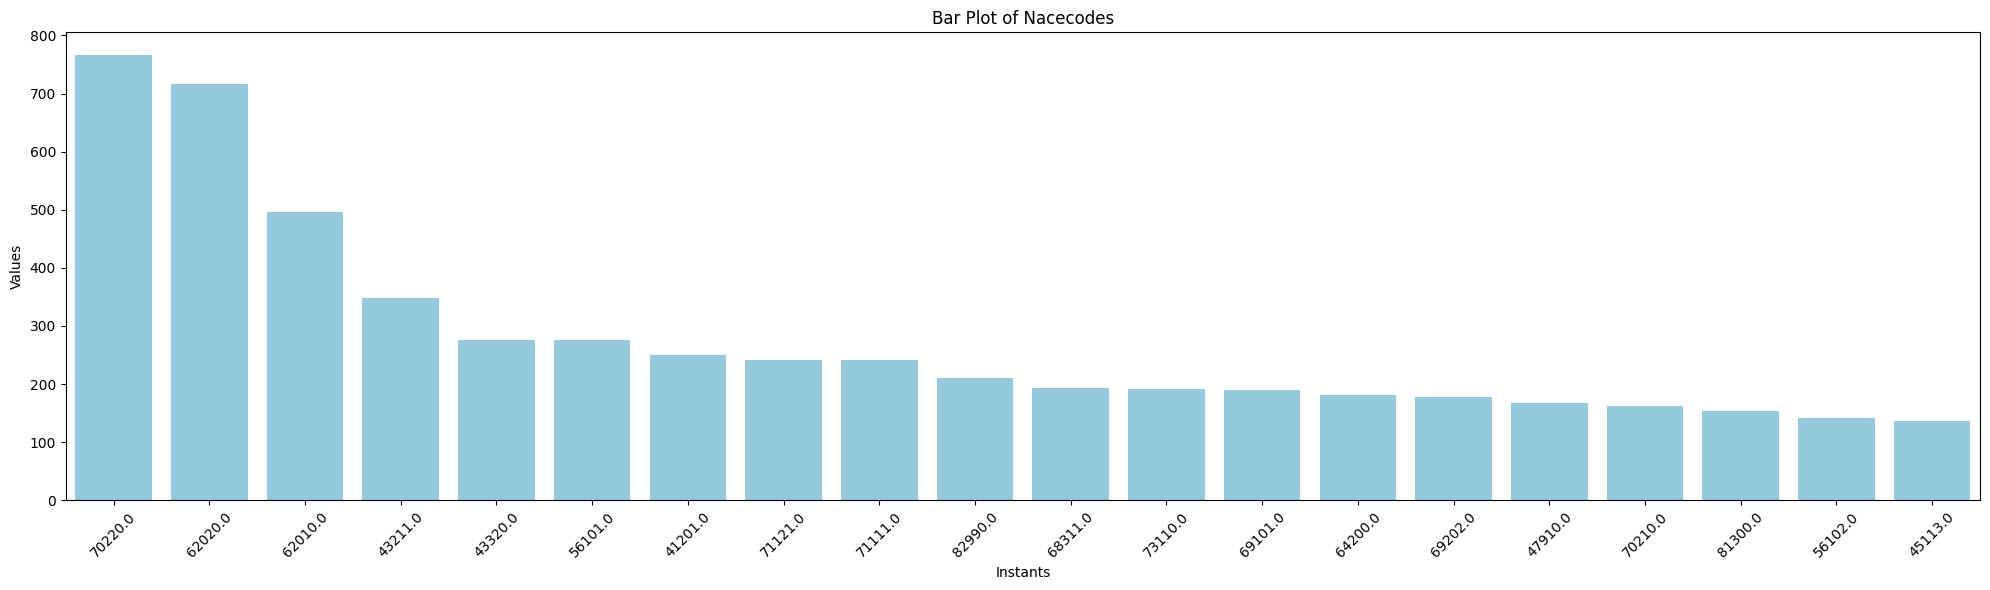

In [42]:
#Show basic info df_final_URL
print(df_final_URL)

#Show count of Nacecodes
Nacecodes = df_final_URL['NaceCode'].value_counts()
print(Nacecodes.head())
sorted_Nacecodes = Nacecodes.head(20).sort_values(ascending=False)

#barplot of different nacecodes
plt.figure(figsize=(20, 6))
sns.barplot(x=sorted_Nacecodes.head(20).index, y=sorted_Nacecodes.head(20), color='skyblue', order=sorted_Nacecodes.index)
plt.xlabel('Instants')
plt.ylabel('Values')
plt.title('Bar Plot of Nacecodes')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.tight_layout()
plt.show()